# 1. 합성곱 신경망 소개

In [2]:
## 간단한 컨브넷 만들기
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)xq

outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
## MNIST 이미지에 컨브넷 훈련하기
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8857 - loss: 0.3615
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9861 - loss: 0.0446
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9905 - loss: 0.0321
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9926 - loss: 0.0228
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9942 - loss: 0.0175


In [5]:
## 컨브넷 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0269
test_acc: 0.9923999905586243


In [7]:
## 최대 풀링 층이 빠진 잘못된 구조의 컨브넷
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation='softmax')(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

model_no_max_pool.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       619,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,202 (2.72 MB)

 Trainable params: 712,202 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

# 2. 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

In [29]:
## Dogs vs Cats 데이터셋을 다운
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 811M/812M [00:29<00:00, 30.6MB/s]
100%|████████████████████████████████████████| 812M/812M [00:29<00:00, 28.6MB/s]


In [33]:
## 이미지를 훈려, 검증, 테스트 폴더로 복사하기
import os, shutil, pathlib

original_dir = pathlib.Path('./dogs-vs-cats/train') ## 원본 데이터셋을 압축 해제한 디렉터리 경로
new_base_dir = pathlib.Path('./dogs-vs-cats_small') ## 서브셋 데이터셋을 저장할 디렉터리 경로

## start_idx ~ end_idx-1의 고양이 이미지를 new_base_dir/cat(or dog)으로 복사하기 위한 유틸리티 함수
## subset_name: 'train', 'validation', 'test' 중 하나
def make_subset(subset_name, start_idx, end_idx):
    for category in ['cat', 'dog']:
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_idx, end_idx)]

        for fname in fnames:
            shutil.copyfile(original_dir / fname, dir / fname) 

make_subset('train', start_idx=0, end_idx=1000) ## 카테고리마다 처음 1000개의 이미지를 훈련 서브셋으로 복사
make_subset('validation', start_idx=1000, end_idx=1500) ## 카테고리마다 그다음 500개의 이미지를 검증 서브셋으로 복사
make_subset('test', start_idx=1500, end_idx=2000) ## 카테고리마다 그다음 1000개의 이미지를 테스트 서브셋으로 복사

In [35]:
## 강아지 vs 고양이 이미지 분류 컨브넷 만들기
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3)) ## 이 모델은 180x180 크기의 컬러 이미지 입력을 받음
## 입력 이미지의 픽셀 값을 [0, 1] 사이로 스케일 조정, 각 필터랑 3 채널(RGB)값을 더함
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation='sigmoid')(x) ## 이진 분류를 위한 시그모이드 활성화 함수
model = keras.Model(inputs=inputs, outputs=outputs)

## 모델의 구조를 확인
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
## 모델 컴파일하기
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [37]:
## image_dataset_from_directory() 함수를 사용하여 디스크에 저장된 이미지 데이터를 읽기
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [38]:
## 데이터셋을 사용하여 모델 훈련하기
callbacks = [ ## 이벤트를 모니터링하고 제어하는 데 사용
    keras.callbacks.ModelCheckpoint( ## 특정 지표(val_loss)가 향상될 때 모델의 가중치를 저장
        filepath='convent_from_scratch.keras', ## 저장할 파일명(경로는 현재 ipynb 파일이 있는 디렉터리)
        save_best_only=True, ## True: 가장 좋은 모델만 저장, False: 모든 모델 저장
        monitor='val_loss',)
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - accuracy: 0.4954 - loss: 0.7107 - val_accuracy: 0.5170 - val_loss: 0.6920
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - accuracy: 0.5335 - loss: 0.6929 - val_accuracy: 0.5060 - val_loss: 0.6979
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - accuracy: 0.5704 - loss: 0.6927 - val_accuracy: 0.5310 - val_loss: 0.7260
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.5968 - loss: 0.6607 - val_accuracy: 0.5920 - val_loss: 0.6652
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step - accuracy: 0.6475 - loss: 0.6415 - val_accuracy: 0.6370 - val_loss: 0.6474
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.6788 - loss: 0.5982 - val_accuracy: 0.6710 - val_loss: 0.5997
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.7108 - loss: 0.5681 - val_accuracy: 0.6800 - val_loss: 0.6649
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.7306 - loss: 0.5296 - val_accu

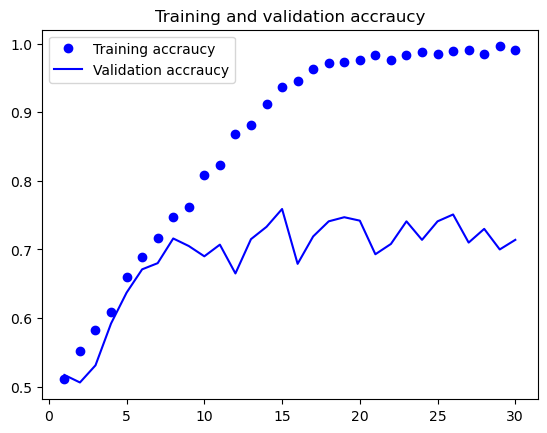

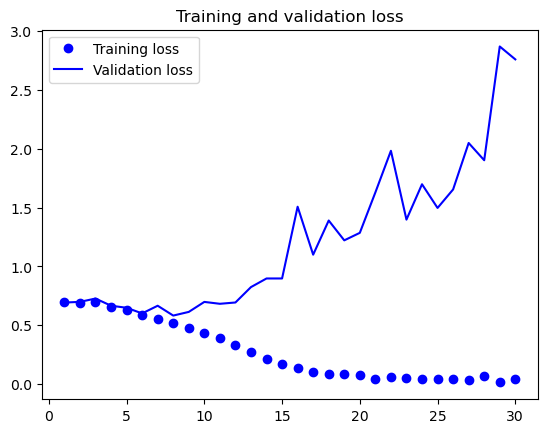

In [39]:
## 훈련 과정의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

accraucy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accraucy) + 1)
plt.plot(epochs, accraucy, 'bo', label='Training accraucy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accraucy')
plt.title('Training and validation accraucy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
## 테스트 세트에서 모델 평가하기

## 과대적합되기 전의 상태를 평가하기 위해 저장된 파일에서 모델을 로드
test_model = keras.models.load_model('convent_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7151 - loss: 0.5645
Test accuracy: 0.697000
